In [61]:
#!pip install seaborn
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import requests
import json
import seaborn as sns
import calendar
#from config import gkey
#from config import omdb_api_key

In [45]:
# File to Load
crime_data_to_load = "Resources/crime_09_20_clean_dupsdeleted.csv"



In [46]:
# Read  Data File and store into Pandas DataFrames
crime_data = pd.read_csv(crime_data_to_load)

#print data frame
crime_data.head()


C:\Users\betsy\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,offense_id,occur_date,occur_time,location,UC2_Literal,neighborhood,lat,long,occur_year,occur_month
0,193651657,12/31/2019,1458,1388 LA FRANCE ST NE,LARCENY-NON VEHICLE,Edgewood,33.76053,-84.34220,2019,12
1,193651031,12/31/2019,1300,443 MORELAND AVE SE,LARCENY-NON VEHICLE,Ormewood Park,33.74179,-84.34973,2019,12
2,193650870,12/31/2019,1200,2711 METROPOLITAN PKWY SW,LARCENY-NON VEHICLE,Hammond Park,33.68092,-84.40814,2019,12
3,193651019,12/31/2019,1300,969 MARIETTA ST NW,LARCENY-NON VEHICLE,Marietta Street Artery,33.77828,-84.40910,2019,12
4,193651039,12/31/2019,1300,3070 BOLLING WAY NE,LARCENY-NON VEHICLE,Buckhead Village,33.83888,-84.37995,2019,12


In [47]:
#Get data frame for just the year 2020

crime_data_2020 = crime_data.loc[(crime_data["occur_year"] == 2020)]
crime_data_2020

,offense_id,occur_date,occur_time,location,UC2_Literal,neighborhood,lat,long,occur_year,occur_month
342347,203660108,12/31/2020,1:15,1974 SYLVAN RD SW,AGG ASSAULT,Sylvan Hills,33.700432,-84.418128,2020,12
342348,203660240,12/31/2020,0:00,361 OLIVER ST NW,AUTO THEFT,English Avenue,33.764633,-84.415338,2020,12
342349,203660279,12/31/2020,3:50,800 WEST MARIETTA ST NW,LARCENY-NON VEHICLE,English Avenue,33.778925,-84.412613,2020,12
342350,203660299,12/31/2020,4:15,1054 RIDGE AVE SW,ROBBERY,Peoplestown,33.726336,-84.391717,2020,12
342351,203660335,12/31/2020,3:00,2284 CHESHIRE BRIDGE RD NE,LARCENY-FROM VEHICLE,Lindridge/Martin Manor,33.817488,-84.352555,2020,12
...,...,...,...,...,...,...,...,...,...,...
364243,200011298,1/1/2020,14:45,2630 MARTIN L KING JR DR SW,AUTO THEFT,Harland Terrace,33.753770,-84.474050,2020,1
364244,200011823,1/1/2020,20:00,540 HUMPHRIES ST SW,AUTO THEFT,Mechanicsville,33.739900,-84.404880,2020,1
364245,200020105,1/1/2020,21:45,1174 EUCLID AVE NE,AUTO THEFT,Inman Park,33.765530,-84.349340,2020,1
364246,200020704,1/1/2020,20:00,383 RALPH MCGILL BLVD NE,AUTO THEFT,Old Fourth Ward,33.763910,-84.374890,2020,1


In [48]:
crime_duplicates = crime_data_2020[crime_data_2020.duplicated(["offense_id","occur_year"])]
crime_duplicates

,offense_id,occur_date,occur_time,location,UC2_Literal,neighborhood,lat,long,occur_year,occur_month
349607,202720096,9/28/2020,1:10,1222 W MARIETTA ST NW,ROBBERY,Knight Park/Howell Station,33.78604,-84.42737,2020,9


In [49]:
#group by month
crime_type = crime_data_2020.groupby("occur_month")
crime_type.head()

crime_count = crime_type["offense_id"].count()
crime_count

#crime_count.sort_values(by="occur_month")

occur_month
1     2184
2     1776
3     1574
4     1130
5     1339
6     1638
7     1625
8     1802
9     1622
10    2314
11    2430
12    2467
Name: offense_id, dtype: int64

In [50]:
import calendar
crime_count = crime_count.reset_index()
crime_count
# crime_count
crime_count['occur_month'] = crime_count['occur_month'].apply(lambda x: calendar.month_abbr[x])
crime_count

,occur_month,offense_id
0,Jan,2184
1,Feb,1776
2,Mar,1574
3,Apr,1130
4,May,1339
5,Jun,1638
6,Jul,1625
7,Aug,1802
8,Sep,1622
9,Oct,2314


In [51]:
crime_count = crime_count.reset_index()
crime_month_id = crime_count[["occur_month","offense_id"]]

#crime_count = crime_count.reset_index()
crime_month_id =  crime_month_id.set_index("occur_month")
crime_month_id

,offense_id
occur_month,
Jan,2184
Feb,1776
Mar,1574
Apr,1130
May,1339
Jun,1638
Jul,1625
Aug,1802
Sep,1622


<IPython.core.display.Javascript object>


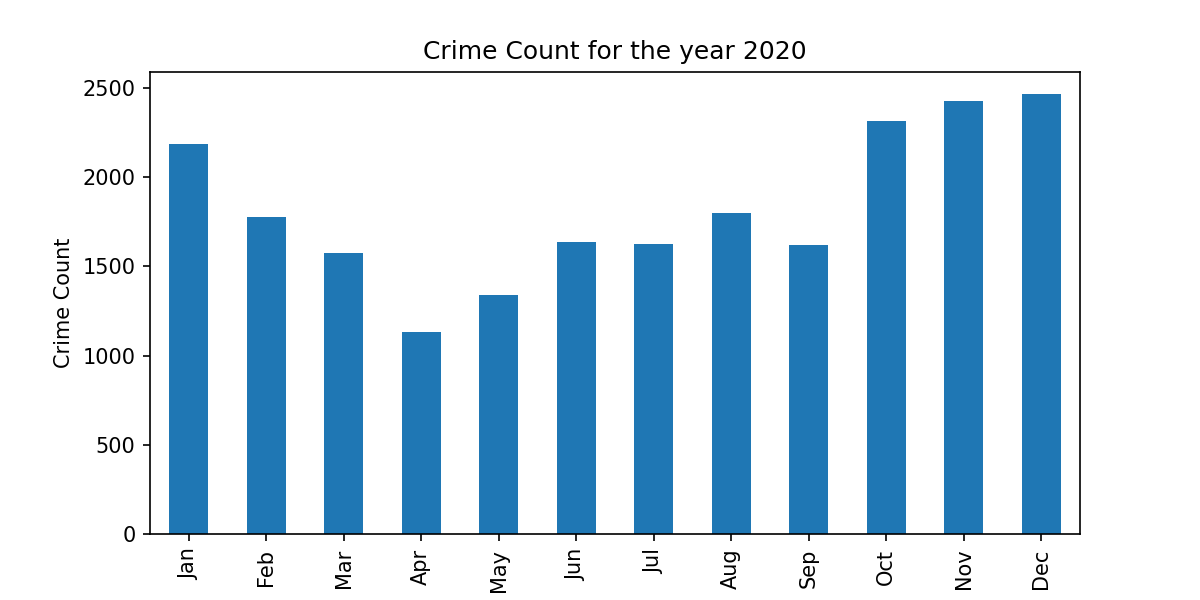

In [52]:
crime_month_id.plot(kind="bar", figsize=(8,4),legend =False)

plt.title("Crime Count for the year 2020")
plt.ylabel("Crime Count")
plt.xlabel("Occur Month")

plt.show()
#plt.tight_layout()

In [53]:
#Group by type
crime_type = crime_data_2020.groupby(["UC2_Literal"])
crime_type.head()

#Get month data
crime_month = crime_type["offense_id"].count()
crime_month


UC2_Literal
AGG ASSAULT             2337
AUTO THEFT              3226
BURGLARY                2089
HOMICIDE                 146
LARCENY-FROM VEHICLE    8584
LARCENY-NON VEHICLE     4628
MANSLAUGHTER               2
ROBBERY                  889
Name: offense_id, dtype: int64

<IPython.core.display.Javascript object>


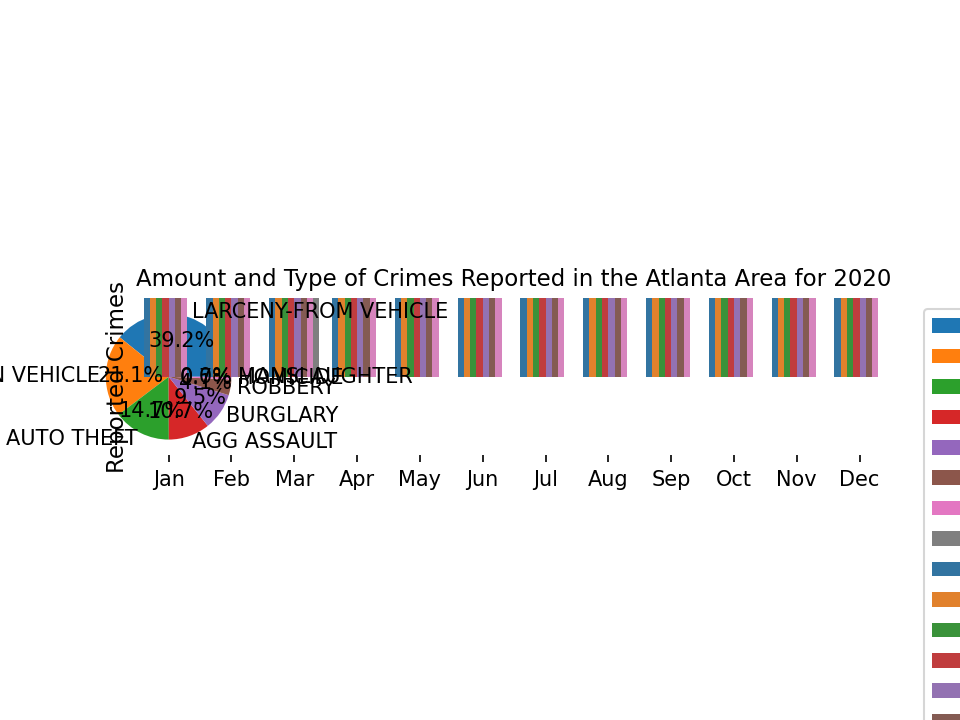

In [66]:
crime_pie = crime_data_2020["UC2_Literal"].value_counts()
crime_pie

crime_pie.plot(kind="pie", autopct='%1.1f%%',legend = False)
#crime_pie.plot(kind="pie", y = "offense_id", autopct='%1.1f%%',
              #startangle=140, shadow=True, legend = False)
#plt.axis("equal")

plt.title("Crime Type Distribution 2020")
plt.ylabel("")
plt.show()
plt.tight_layout()

In [77]:
#Group by type
crime_type_month = crime_data_2020.groupby(["occur_month","UC2_Literal"])
crime_type_group = crime_type_month["offense_id"].count()
crime_type_group

occur_month  UC2_Literal         
1            AGG ASSAULT              128
             AUTO THEFT               270
             BURGLARY                 202
             HOMICIDE                   5
             LARCENY-FROM VEHICLE     944
                                     ... 
12           BURGLARY                 161
             HOMICIDE                  16
             LARCENY-FROM VEHICLE    1177
             LARCENY-NON VEHICLE      423
             ROBBERY                   73
Name: offense_id, Length: 85, dtype: int64

In [78]:
crime_type_month_df = pd.DataFrame(crime_type_group).reset_index()
crime_type_month_df 

crime_type_month_df['occur_month'] = crime_type_month_df['occur_month'].apply(lambda x: calendar.month_abbr[x])
crime_type_month_df

,occur_month,UC2_Literal,offense_id
0,Jan,AGG ASSAULT,128
1,Jan,AUTO THEFT,270
2,Jan,BURGLARY,202
3,Jan,HOMICIDE,5
4,Jan,LARCENY-FROM VEHICLE,944
...,...,...,...
80,Dec,BURGLARY,161
81,Dec,HOMICIDE,16
82,Dec,LARCENY-FROM VEHICLE,1177
83,Dec,LARCENY-NON VEHICLE,423


<IPython.core.display.Javascript object>


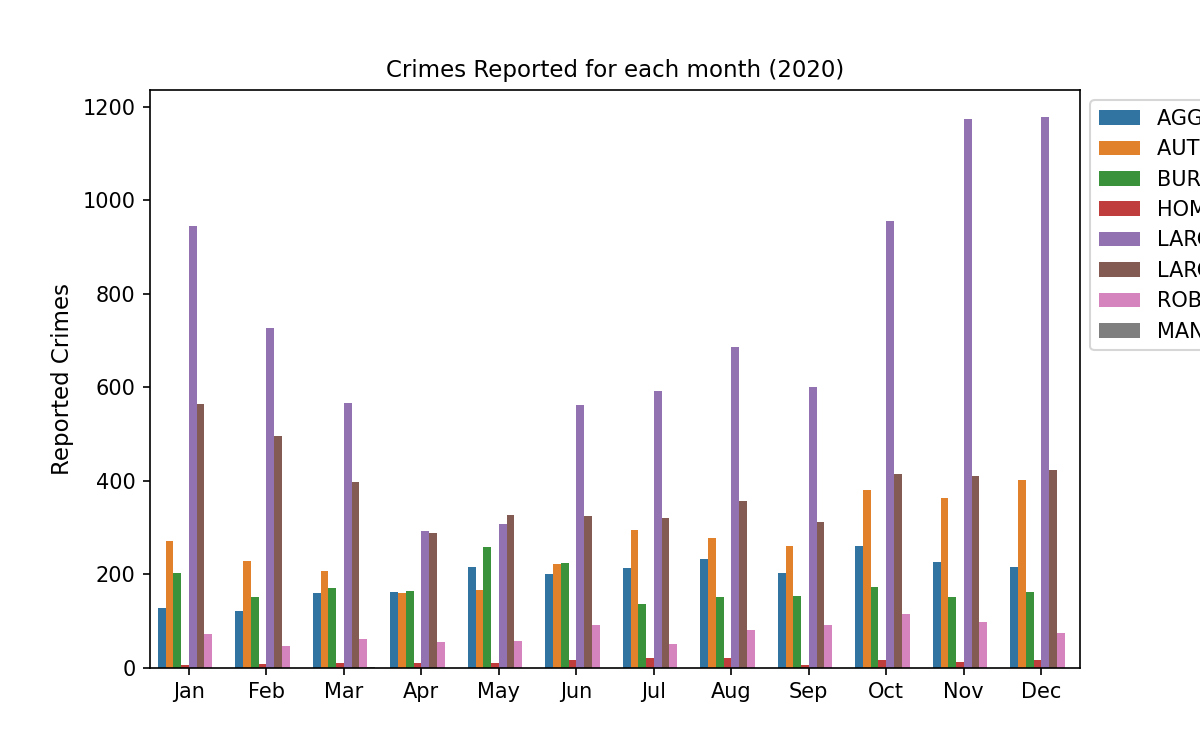

Text(0.5, 0, '')

In [88]:
#Plot all years and types of crimes - will be very large

#Set figure size with MatPlotlib
plt.figure(figsize=(8,5))
#Plot with seaborn
sns.barplot(x = 'occur_month', y = 'offense_id', hue = 'UC2_Literal', data = crime_type_month_df)

#Move legend
plt.legend(bbox_to_anchor= (1, 1) );

#Add title and labels for each axis and set font size. 
plt.title("Crimes Reported for each month (2020)", fontsize = (11))
plt.ylabel("Reported Crimes", fontsize = (11))
plt.xlabel("")

In [ ]:
import calendar
#crime_month = crime_month.reset_index()
#crime_month
# crime_count
#crime_month['occur_month'] = crime_month['occur_month'].apply(lambda x: calendar.month_abbr[x])
crime_month

In [ ]:

#Group by type
crime_type_plot = (crime_data_2020.groupby(["UC2_Literal"])["offense_id"].count()).tolist()
crime_type_plot

#drug_count = (mouse_study_clean.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
#drug_count